# Implementing A Six-Compartment Model for COVID-19 with Transmission Dynamics and Public Health Strategies


## About the Paper
Implementing paper titled **A six-compartment model for COVID-19 with transmission dynamics and public health strategies** written byt
Venkatesh Ambalarajan, Ankamma Rao Mallela, Vinoth Sivakumar, Prasantha Bharathi Dhandapani, Víctor Leiva, Carlos Martin-Barreiro & Cecilia Castro with [DOI](https://doi.org/10.1038/s41598-024-72487-9). 

### 1. Defining the Model Parameters

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp 

In [16]:
# Parameters from Table 1
Lambda = 0  # Assuming no recruitment for simplicity
mu = 0.00004  # Natural mortality rate
theta = 0.5  # Proportion of asymptomatic cases reported as symptomatic
omega = 0.2  # Conversion rate from asymptomatic to symptomatic per day
zeta_A = 0.4  # Adjustment parameter for asymptomatic
zeta_I = 0.3  # Adjustment parameter for reported symptomatic
zeta_G = 0.3  # Adjustment parameter for isolated
beta = 0.4162  # Transmission rate per day
eta_I = 0.0175  # Isolation rate from reported symptomatic per day
eta_U = 0.0768  # Isolation rate from unreported symptomatic per day
gamma_I = 0.0714  # Recovery rate from reported symptomatic per day
gamma_U = 0.0714  # Recovery rate from unreported symptomatic per day
gamma_G = 0.0714  # Recovery rate from isolated per day
mu_I = 0.0016  # Mortality rate of reported symptomatic per day
mu_U = 0.0016  # Mortality rate of unreported symptomatic per day
mu_G = 0.0025  # Mortality rate of isolated per day

### 2. Implementing The Differential Equation Method

In [17]:
def dSdt(S, A, I, U, G, R):
    return Lambda - beta * (zeta_A * A + zeta_I * I + zeta_G * G) * S / N - mu * S


def dAdt(S, A, I, U, G, R):
    return beta * (zeta_A * A + zeta_I * I + zeta_G * G) * S / N - (omega + mu) * A


def dIdt(A, I, U, G, R):
    return theta * omega * A - (eta_I + gamma_I + mu_I + mu) * I


def dUdt(A, I, U, G, R):
    return (1 - theta) * omega * A - (eta_U + gamma_U + mu_U + mu) * U


def dGdt(I, U, G, R):
    return eta_I * I + eta_U * U - (gamma_G + mu_G + mu) * G


def dRdt(I, U, G, R):
    return gamma_I * I + gamma_U * U + gamma_G * G - mu * R


# Initial conditions
S0 = 1e6  # Initial susceptible population
A0 = 100  # Initial asymptomatic cases
I0 = 50   # Initial reported symptomatic cases
U0 = 50   # Initial unreported symptomatic cases
G0 = 0    # Initial isolated cases
R0 = 0    # Initial recovered cases
N = S0 + A0 + I0 + U0 + G0 + R0  # Total population

# Time span for simulation
t_span = (0, 400)
t = np.linspace(t_span[0], t_span[1], 401)

# Define the system of ODEs


def model(t, y):
    S, A, I, U, G, R = y
    dS = dSdt(S, A, I, U, G, R)
    dA = dAdt(S, A, I, U, G, R)
    dI = dIdt(A, I, U, G, R)
    dU = dUdt(A, I, U, G, R)
    dG = dGdt(I, U, G, R)
    dR = dRdt(I, U, G, R)
    return [dS, dA, dI, dU, dG, dR]

# Solve the ODEs
sol = solve_ivp(model, t_span, [S0, A0, I0, U0, G0, R0], t_eval=t)

### 3. Implementing Monte Carlo Method

In [18]:
def montecarlo_simulation(initial_state, parameters, t_max):
    S, A, I, U, G, R = initial_state
    events = [
        ('S -> A', beta * (zeta_A * A + zeta_I * I + zeta_G * G) * S / N),
        ('A -> removed', (omega + mu) * A),
        ('A -> I', theta * omega * A),
        ('A -> U', (1 - theta) * omega * A),
        ('I -> removed', (eta_I + gamma_I + mu_I + mu) * I),
        ('U -> removed', (eta_U + gamma_U + mu_U + mu) * U),
        ('G -> removed', (gamma_G + mu_G + mu) * G),
        ('I -> G', eta_I * I),
        ('U -> G', eta_U * U),
        ('R -> removed', mu * R),
        ('R -> increased by recovery', gamma_I * I + gamma_U * U + gamma_G * G)
    ]
    # Implement Gillespie algorithm here
    # This is a placeholder for the actual implementation
    pass


# Placeholder for stochastic simulation results
S_stochastic = np.zeros_like(t)
A_stochastic = np.zeros_like(t)
I_stochastic = np.zeros_like(t)
U_stochastic = np.zeros_like(t)
G_stochastic = np.zeros_like(t)
R_stochastic = np.zeros_like(t)

### 4. Implementing Compartment Method

In [ ]:
def compartment_model(t, initial_state, parameters):
    dt = 1  # Time step
    S, A, I, U, G, R = initial_state
    S_list = [S]
    A_list = [A]
    I_list = [I]
    U_list = [U]
    G_list = [G]
    R_list = [R]
    for _ in range(int(t)):
        dS = dSdt(S, A, I, U, G, R) * dt
        dA = dAdt(S, A, I, U, G, R) * dt
        dI = dIdt(A, I, U, G, R) * dt
        dU = dUdt(A, I, U, G, R) * dt
        dG = dGdt(I, U, G, R) * dt
        dR = dRdt(I, U, G, R) * dt
        S += dS
        A += dA
        I += dI
        U += dU
        G += dG
        R += dR
        S_list.append(S)
        A_list.append(A)
        I_list.append(I)
        U_list.append(U)
        G_list.append(G)
        R_list.append(R)
    return S_list, A_list, I_list, U_list, G_list, R_list


# Parameters from Table 1
parameters = {
    'Lambda': Lambda,
    'mu': mu,
    'theta': theta,
    'omega': omega,
    'zeta_A': zeta_A,
    'zeta_I': zeta_I,
    'zeta_G': zeta_G,
    'beta': beta,
    'eta_I': eta_I,
    'eta_U': eta_U,
    'gamma_I': gamma_I,
    'gamma_U': gamma_U,
    'gamma_G': gamma_G,
    'mu_I': mu_I,
    'mu_U': mu_U,
    'mu_G': mu_G
}

# Run compartment model
S_compartment, A_compartment, I_compartment, U_compartment, G_compartment, R_compartment = compartment_model(
    400, [S0, A0, I0, U0, G0, R0], parameters)

### 5. Plotting Graph

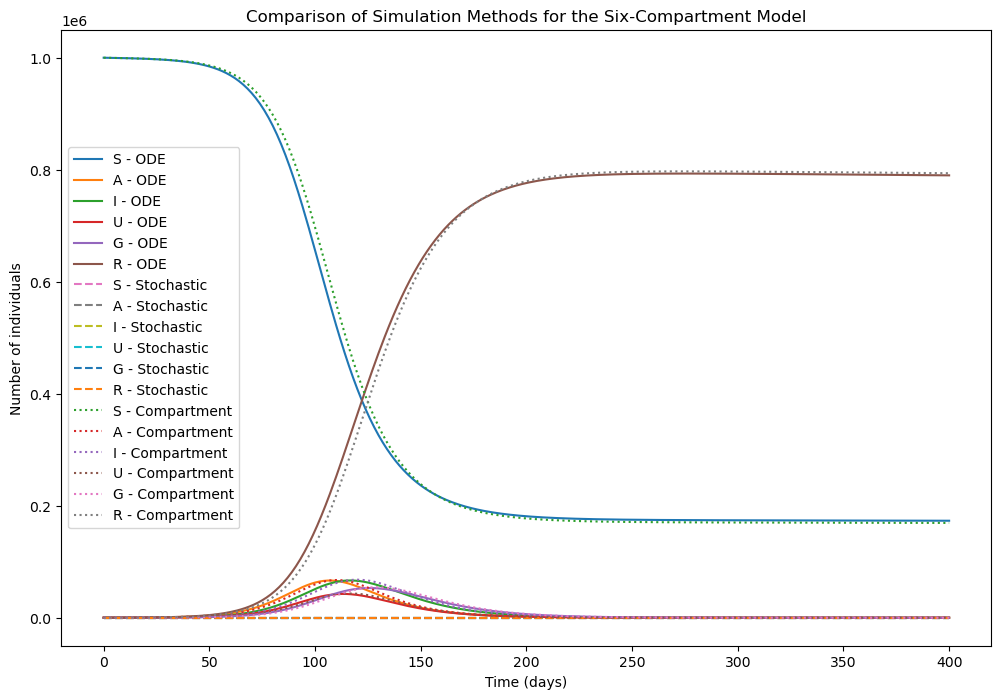

In [20]:
plt.figure(figsize=(12, 8))

# Plot differential equation results
plt.plot(t, sol.y[0], label='S - ODE')
plt.plot(t, sol.y[1], label='A - ODE')
plt.plot(t, sol.y[2], label='I - ODE')
plt.plot(t, sol.y[3], label='U - ODE')
plt.plot(t, sol.y[4], label='G - ODE')
plt.plot(t, sol.y[5], label='R - ODE')

# Plot stochastic simulation results (placeholder)
plt.plot(t, S_stochastic, label='S - Stochastic', linestyle='--')
plt.plot(t, A_stochastic, label='A - Stochastic', linestyle='--')
plt.plot(t, I_stochastic, label='I - Stochastic', linestyle='--')
plt.plot(t, U_stochastic, label='U - Stochastic', linestyle='--')
plt.plot(t, G_stochastic, label='G - Stochastic', linestyle='--')
plt.plot(t, R_stochastic, label='R - Stochastic', linestyle='--')

# Plot compartment model results
plt.plot(t, S_compartment, label='S - Compartment', linestyle=':')
plt.plot(t, A_compartment, label='A - Compartment', linestyle=':')
plt.plot(t, I_compartment, label='I - Compartment', linestyle=':')
plt.plot(t, U_compartment, label='U - Compartment', linestyle=':')
plt.plot(t, G_compartment, label='G - Compartment', linestyle=':')
plt.plot(t, R_compartment, label='R - Compartment', linestyle=':')

plt.xlabel('Time (days)')
plt.ylabel('Number of individuals')
plt.title('Comparison of Simulation Methods for the Six-Compartment Model')
plt.legend()
plt.show()